In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [38]:
#Reading all files from local directory
featureVectorsTrain = pd.read_csv(r"C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Machine Learning\Exercises\Exercise 2\features-train.tsv", sep="\t")
labelTrain = pd.read_csv(r"C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Machine Learning\Exercises\Exercise 2\labels-train.tsv", sep="\t")
featureVectorsTest = pd.read_csv(r"C:\Users\pc\Documents\DIGITAL ENGINEERING\Winter 2024\Machine Learning\Exercises\Exercise 2\features-test.tsv", sep="\t")


In [39]:
featureVectorsTrain #Viewing the data set of the test features

,id,num_characters,num_sentences,num_words,num_unique_words,num_stop_words,stop_word_ratio,avg_word_length,avg_sentence_length,num_punctuation,...,num_uppercase,uppercase_ratio,flesch_reading_ease,entropy,has_question_mark,has_exclamation_mark,num_adjectives,adjective_ratio,num_repeated_words,repeated_word_ratio
0,0,4000,32,741,352,240,0.323887,4.587045,23.156250,140,...,85,0.021250,53.71,7.562288,False,False,38,0.051282,292,0.394062
1,1,2207,17,425,207,153,0.360000,4.265882,25.000000,52,...,106,0.048029,64.24,7.046098,True,False,33,0.077647,147,0.345882
2,2,2653,23,514,201,139,0.270428,4.377432,22.347826,153,...,114,0.042970,65.62,6.887864,True,False,20,0.038911,292,0.568093
3,3,4696,34,871,419,325,0.373134,4.518944,25.617647,121,...,86,0.018313,50.67,7.813449,True,False,67,0.076923,301,0.345580
4,4,2364,14,408,185,136,0.333333,4.919118,29.142857,55,...,64,0.027073,37.03,6.764269,False,False,30,0.073529,170,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,2169,1877,11,326,161,109,0.334356,4.880368,29.636364,40,...,89,0.047416,38.45,6.704167,False,False,16,0.049080,131,0.401840
2170,2170,4532,20,823,301,290,0.352369,4.617254,41.150000,125,...,133,0.029347,42.89,7.324157,False,False,69,0.083840,373,0.453220
2171,2171,3045,27,602,240,222,0.368771,4.244186,22.296296,105,...,111,0.036453,61.16,7.060927,False,False,27,0.044850,268,0.445183
2172,2172,3528,21,591,281,199,0.336717,5.098139,28.142857,102,...,166,0.047052,33.54,7.205878,False,False,48,0.081218,218,0.368866


In [40]:
labelTrain #Viewing the dataset of the labels

,id,is_human
0,0,True
1,1,True
2,2,True
3,3,True
4,4,False
...,...,...
2169,2169,True
2170,2170,True
2171,2171,False
2172,2172,False


In [41]:
featureVectorsTest #viewing the feature vectors for testing the model

,id,num_characters,num_sentences,num_words,num_unique_words,num_stop_words,stop_word_ratio,avg_word_length,avg_sentence_length,num_punctuation,...,num_uppercase,uppercase_ratio,flesch_reading_ease,entropy,has_question_mark,has_exclamation_mark,num_adjectives,adjective_ratio,num_repeated_words,repeated_word_ratio
0,0gb1HsAjRk-2utqEACKFWQ,2878,34,589,233,184,0.312394,4.093379,17.323529,135,...,133,0.046213,66.94,6.947358,False,False,21,0.035654,294,0.499151
1,0PfrJzV0RZqB_9lfDhMFSw,2534,19,453,186,174,0.384106,4.708609,23.842105,59,...,112,0.044199,50.26,6.776612,False,False,27,0.059603,191,0.421634
2,2KGMCgZaS6quDwafurHo2A,2544,21,460,235,160,0.347826,4.647826,21.904762,65,...,94,0.036950,55.74,7.161564,False,False,16,0.034783,157,0.341304
3,3dvXDEhyTd6H7-qeyLEnyA,688,4,124,86,50,0.403226,4.620968,31.000000,12,...,22,0.031977,56.79,6.142333,False,False,3,0.024194,20,0.161290
4,3ODuDXxFStyy0dFChdII9Q,2352,16,395,189,150,0.379747,4.997468,24.687500,43,...,70,0.029762,39.97,6.915360,False,False,31,0.078481,144,0.364557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,yPB40Ld8SVmb5W_IyhW5aQ,4105,25,728,354,250,0.343407,4.699176,29.120000,77,...,137,0.033374,53.14,7.653239,False,False,45,0.061813,275,0.377747
96,zEN3hEeiRYGfYddlcpsl9g,2572,6,440,179,131,0.297727,4.986364,73.333333,99,...,202,0.078538,35.91,6.845989,False,False,33,0.075000,222,0.504545
97,zgMbt170RVG-fOnaTTk3fw,3003,14,520,226,182,0.350000,4.903846,37.142857,70,...,68,0.022644,30.03,6.921505,False,False,38,0.073077,218,0.419231
98,-zzaN1zuRWWcgWIbiowK2A,2913,22,534,280,192,0.359551,4.567416,24.272727,71,...,128,0.043941,43.22,7.404546,False,False,32,0.059925,182,0.340824


In [51]:
#Implementing a function to merge train features with labels
trainFeatures_label_merged = pd.merge(featureVectorsTrain, labelTrain, on = ["id"])

In [53]:
trainFeatures_label_merged

,id,num_characters,num_sentences,num_words,num_unique_words,num_stop_words,stop_word_ratio,avg_word_length,avg_sentence_length,num_punctuation,...,uppercase_ratio,flesch_reading_ease,entropy,has_question_mark,has_exclamation_mark,num_adjectives,adjective_ratio,num_repeated_words,repeated_word_ratio,is_human
0,0,4000,32,741,352,240,0.323887,4.587045,23.156250,140,...,0.021250,53.71,7.562288,False,False,38,0.051282,292,0.394062,True
1,1,2207,17,425,207,153,0.360000,4.265882,25.000000,52,...,0.048029,64.24,7.046098,True,False,33,0.077647,147,0.345882,True
2,2,2653,23,514,201,139,0.270428,4.377432,22.347826,153,...,0.042970,65.62,6.887864,True,False,20,0.038911,292,0.568093,True
3,3,4696,34,871,419,325,0.373134,4.518944,25.617647,121,...,0.018313,50.67,7.813449,True,False,67,0.076923,301,0.345580,True
4,4,2364,14,408,185,136,0.333333,4.919118,29.142857,55,...,0.027073,37.03,6.764269,False,False,30,0.073529,170,0.416667,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,2169,1877,11,326,161,109,0.334356,4.880368,29.636364,40,...,0.047416,38.45,6.704167,False,False,16,0.049080,131,0.401840,True
2170,2170,4532,20,823,301,290,0.352369,4.617254,41.150000,125,...,0.029347,42.89,7.324157,False,False,69,0.083840,373,0.453220,True
2171,2171,3045,27,602,240,222,0.368771,4.244186,22.296296,105,...,0.036453,61.16,7.060927,False,False,27,0.044850,268,0.445183,False
2172,2172,3528,21,591,281,199,0.336717,5.098139,28.142857,102,...,0.047052,33.54,7.205878,False,False,48,0.081218,218,0.368866,False


In [ ]:
# Task (a): Select two features (e.g. num_words and num_characters) and plot a scatterplot for the examples in 
# the training set between the two features. 
# Color the points according to the class is_human. Submit the plot.

[1 0]


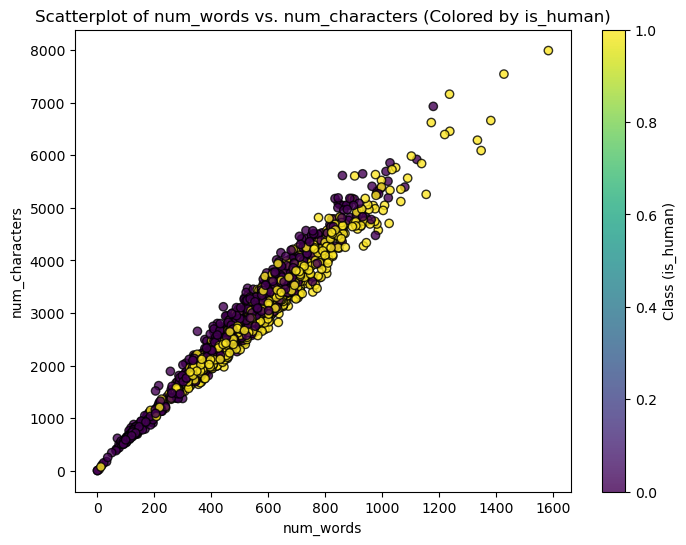

In [62]:
# Map 'True' and 'False' to numerical values (e.g., 1 and 0) for coloring
trainFeatures_label_merged["numeric_class"] = trainFeatures_label_merged["is_human"].map({True: 1, False: 0})

# Verify that 'numeric_class' contains valid values
print(trainFeatures_label_merged["numeric_class"].unique())

# Create scatter plot with color coding
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    trainFeatures_label_merged["num_words"],
    trainFeatures_label_merged["num_characters"],
    c=trainFeatures_label_merged["numeric_class"],  # Use numeric_class for color mapping
    cmap="viridis",  # Apply colormap for better distinction
    alpha=0.8,       # Set transparency
    edgecolors="k"   # Add edge color for points
)

# Add color bar to indicate the mapping of class
plt.colorbar(scatter, label="Class (is_human)")

# Add labels and title
plt.xlabel("num_words")
plt.ylabel("num_characters")
plt.title("Scatterplot of num_words vs. num_characters (Colored by is_human)")

# Show the plot
plt.show()


In [ ]:
# Task (b): Implement the LMS algorithm and use it to compute the weight vector (w0,w1) and add the line of
# best fit to your plot from (a).

Computed weights: w0 = 5.552985946138844e+301, w1 = inf


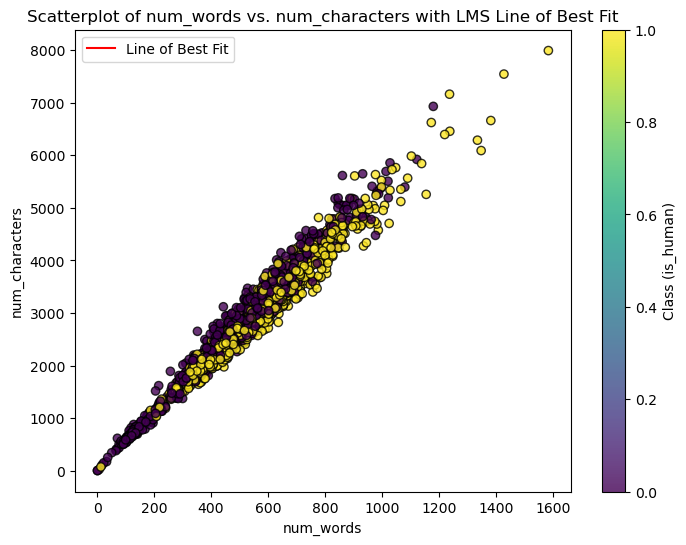

In [70]:
# Define the LMS function
def LeastMeanSquare(X, y):
    # Add bias term to X (intercept w0)
    X_bias = np.vstack([np.ones(X.shape), X]).T
    
    # Check for NaN or Inf in X and y
    if np.isnan(X).any() or np.isinf(X).any():
        print("Warning: NaN or Inf found in input features X!")
        return None
    if np.isnan(y).any() or np.isinf(y).any():
        print("Warning: NaN or Inf found in target variable y!")
        return None

    # Initialize weights and hyperparameters
    weights = np.zeros(X_bias.shape[1])  # [w0, w1]
    learning_rate = 0.001
    max_iterations = 1000
    tolerance = 1e-6

    for _ in range(max_iterations):
        predictions = np.dot(X_bias, weights)  # Predicted values
        errors = y - predictions               # Errors
        gradient = -2 * np.dot(X_bias.T, errors) / len(y)  # Gradient
        weights -= learning_rate * gradient    # Update weights

        # Check for NaN or Inf in weights
        if np.isnan(weights).any() or np.isinf(weights).any():
            print("Warning: NaN or Inf in weights during training!")
            break
        
        # Convergence check
        if np.linalg.norm(gradient) < tolerance:
            break

    return weights

# Prepare input data
X = trainFeatures_label_merged["num_words"].values
y = trainFeatures_label_merged["num_characters"].values

# Call LMS function to compute weights
weights = LeastMeanSquare(X, y)

# Check if the LMS function returned None due to NaN/Inf
if weights is not None:
    print(f"Computed weights: w0 = {weights[0]}, w1 = {weights[1]}")

    # Plot scatterplot with line of best fit
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        trainFeatures_label_merged["num_words"],
        trainFeatures_label_merged["num_characters"],
        c=trainFeatures_label_merged["is_human"].map({True: 1, False: 0}),
        cmap="viridis",
        alpha=0.8,
        edgecolors="k"
    )

    # Line of best fit
    x_line = np.linspace(X.min(), X.max(), 100)
    y_line = weights[0] + weights[1] * x_line
    plt.plot(x_line, y_line, color="red", label="Line of Best Fit")

    # Add labels, title, and legend
    plt.colorbar(scatter, label="Class (is_human)")
    plt.xlabel("num_words")
    plt.ylabel("num_characters")
    plt.title("Scatterplot of num_words vs. num_characters with LMS Line of Best Fit")
    plt.legend()
    plt.show()

In [74]:
# Task (C): Compute the residual sum of squares (RSS) for the weight vector from (b)

# Implementing the function to compute Residual Sum of Squares
def Compute_RSS(y, predictions):
    return np.sum((y - predictions)**2)

# Make predictions using the learned weight vector
X_bias = np.vstack([np.ones(X.shape), X]).T  # Add bias term to the input data (X)
predictions = np.dot(X_bias, weights)  # Calculate predictions using learned weights

# Compute the RSS
rss = Compute_RSS(y, predictions)

print(f"Residual Sum of Squares (RSS): {rss}")

Residual Sum of Squares (RSS): inf


In [ ]:
# Task (d): Use the weight vector from (b) to classify each example in the test set for is_human
# (C = {True, False}). Write the predicted classes to a predictions-test.tsv in the same
# format as the labels-train.tsv (columns id and is_human). Submit the file with the
# predictions.

In [76]:
# Preparing the input features using the same columns as in the training set, i.e num_words)
X_test = featureVectorsTest["num_words"].values  

# Adding bias term to X_test
X_test_bias = np.vstack([np.ones(X_test.shape), X_test]).T

# Making predictions using the learned weight vector
predictions = np.dot(X_test_bias, weights)

# Classifying the predictions based on the sign of the prediction (threshold at 0)
predicted_classes = predictions > 0  # if the prediction > 0, classify as True, else False

# Convert boolean values to 'True'/'False'
predicted_classes = predicted_classes.astype(bool)

# Preparing the results in the same format as labels-train.tsv (columns id, is_human)
predictions_df = pd.DataFrame({
    "id": featureVectorsTest["id"],  # Assuming there's an "id" column in the test set
    "is_human": predicted_classes
})

# Save the predictions to a new file
predictions_df.to_csv("C:/Users/pc/Documents/DIGITAL ENGINEERING/Winter 2024/Machine Learning/Exercises/Exercise 2/predictions-test.tsv", sep="\t", index=False)

print("Predictions have been saved to predictions-test.tsv.")


Predictions have been saved to predictions-test.tsv.
